In [1]:
import numpy as np 
import random 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r = random.sample(range(0,10), 6)

print(r)

[1, 3, 6, 4, 8, 7]


In [3]:
#T is number of interations 
# n is the length of array  
# m is the number of vehicles
class CellularAutomata:
    def __init__(self, T, n, m):
        self.T = T
        self.n = n
        self.m = m 
        self.arr = []
        self.df = []
    
    # here I generate the first array and fill it up in random positions with vehicles
    # generate array is all zeroes 
    # filling with vehicles is when I put in 1s
    def create_fill(self):
        if self.n < self.m: 
            return []
    
        arr = [0] * self.n
        random_positions = random.sample(range(0, self.n-1), self.m)

        for position in range(0, len(random_positions)):
            arr[random_positions[position]] = 1
        
        self.arr = arr
        
    
    
    # translate the vehicle from one array position to another based on the rule
    def translate(self, arr):
        new_arr = arr.copy()
        
        # this is the boundary condition where it comes
        if new_arr[0] == 0 and new_arr[len(new_arr)-1] == 1:
            new_arr[0] = 1
            new_arr[len(new_arr)-1] = 0
        
        # this is the rule. movement occurs if there is a space in front of a vehicle 1 before 0
        for i in range(0, len(arr)-1):
            if arr[i] == 1 and arr[i+1] == 0:
                new_arr[i] = 0
                new_arr[i+1] = 1

        return new_arr
    
    # this executes the logic over the iterations
    # the result is appended to make a pandas table. 
    # first random creation and filling is at Time T0
    def execute(self):
        COLUMNS = []
        for i in range(0, self.n):
            COLUMNS.append('A'+str(i))
            
        
        df = pd.DataFrame(columns=COLUMNS)
        
        arr = self.arr
        df = df.append(dict(zip(df.columns, arr)), ignore_index=True)
        
        for i in range(0, self.T):
            new_arr = self.translate(arr)
            df = df.append(dict(zip(df.columns, new_arr)), ignore_index=True)
            arr = new_arr
            
        self.df = df

In [4]:
def calculateDensity1(df, columnName, iterations):
    total = df[columnName].sum()
    
    
    return total/iterations

def calculateDensity2(m,n):
    return m/n


def calculateFlow1(df, firstColumn, lastColumn, iterations):
    
    movement = 0; 
    for i in range(0, len(df)-1):
        currentRow = df.iloc[i][firstColumn : lastColumn]
        currentRow = currentRow.tolist()
        
        nextRow = df.iloc[i+1][firstColumn : lastColumn]
        nextRow = nextRow.tolist()
        
        if nextRow != currentRow and (max(currentRow) != 0 and max(nextRow) != 0):
            movement = movement +1
    
    
    return movement / iterations

In [5]:
iterations = 30
lengthOfArray = 30
numberOfVehicles = 20

cell = CellularAutomata(iterations, lengthOfArray, numberOfVehicles)
cell.create_fill()
cell.execute()

outputMap = cell.df

# print("Result after iterations")
# outputMap

In [6]:
densityRandomColumnName = 'A1' #for density calculation

#column boundaries for flow calculation
flowFirstColumn = 'A0'  
flowLastColumn = 'A3'

density1 = calculateDensity1(outputMap, densityRandomColumnName, iterations)
#density2 = calculateDensity2(numberOfVehicles,lengthOfArray)
movement = calculateFlow1(outputMap, flowFirstColumn, flowLastColumn, iterations)

print(density1,',', movement)

# print("density1 is "+ str(density1))
# #print("density2 is "+ str(density2))
# print("flow is "+ str(movement))

0.7 , 0.9333333333333333


In [7]:
# outputMap

In [8]:
lst = outputMap.values.tolist()

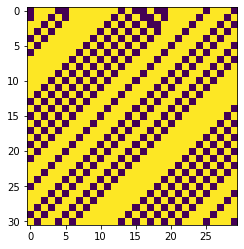

In [9]:
plt.imshow(lst)

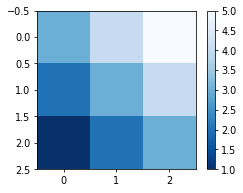

In [172]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
x = [[3, 4, 5],
     [2, 3, 4],
     [1, 2, 3]]

color_map = plt.imshow(x)
color_map.set_cmap("Blues_r")
plt.colorbar()

In [165]:
numpy_array = outputMap.to_numpy()
numpy_array
print(type(numpy_array))

<class 'numpy.ndarray'>


In [168]:
values_array = outputMap.values
values_array
print(type(values_array))

<class 'numpy.ndarray'>


In [174]:
#plt.imshow(numpy_array)

In [173]:
type(x)

list